# DATA ANALYSIS ON CYBERSECURITY INTRUSION DETECTION
### The dataset contains network traffic features that describe various aspects of network connections and whether they are normal or attack.
### Each row represents a network flow record and the goal is to classify whether it's normal or malicious and if malicious, what attack category it belongs to.
### The dataset comprises of 82,332 rows and 45 columns
## COLUMNS TO DROP
### 1. id - this is just a unique row index, no analytical value.
### 2. is_ftp_login - FTP specific, not useful if data is not FTP heavy.
### 3. trans_depth, response_body_len - HTTP-specific.
### 4. stcpb, dtcpb - TCP sequence numbers, not meaningful for behavior analysis.
### 5. is_sm_ips_ports - usually binary but rare varies, this adds little to prediction power.
### 6. tcprtt, synack, ackdat - TCP timing metrics, many zeros.



In [21]:
import pandas as pd 

In [22]:
data=pd.read_csv('UNSW_NB15_training-set.csv')

In [23]:
data.shape

(82332, 45)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [25]:
data.isnull()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82328,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82329,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [27]:
data_clean = data.dropna()

In [28]:
data.shape


(82332, 45)

In [29]:
data.duplicated().sum()

np.int64(0)

In [30]:
data[data.duplicated()]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


In [31]:
columns_to_drop = ['id', 'ct_ftp_cmd','tcprtt','synack','ackdat', 'is_ftp_login','is_sm_ips_ports','ct_flw_http_mthd','stcpb','dtcpb','tcprtt','sloss', 'dloss','trans_depth','response_body_len'] 
data = data.drop(columns=columns_to_drop)

In [32]:
data.shape

(82332, 31)

## DATA VISUALIZATION
### ATTACK CATEGORIES
### From the bar chart plot:
#### 1. Normal traffic dominates the dataset, making up the largest proportion of records. this indicates that the dataset is imbalanced, which is typical in intrusion detection data where normal events far outnumber attacks.
#### 2. Generic attacks -are frequent which represent common exploit patterns such as automated malware or tool-based intrusions.
#### 3. Exploits and Fuzzers are moderate in occurrence.
#### 4. Reconnaissance attacks - appear noticeably, representing probing activities used to gather system information.
#### 5. Less frequent attack types include DoS, Shellcode, Backdoor,Analysis and Worms. Their relatively small representation can make them harder for models to detect, as there are fwer examples to learn from.
#### This class imbalance suggests that data balancing techniques (such as oversampling minority classes or using overweighted loss functions) may be necessary to improve performance in any subsequent machine learning models.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

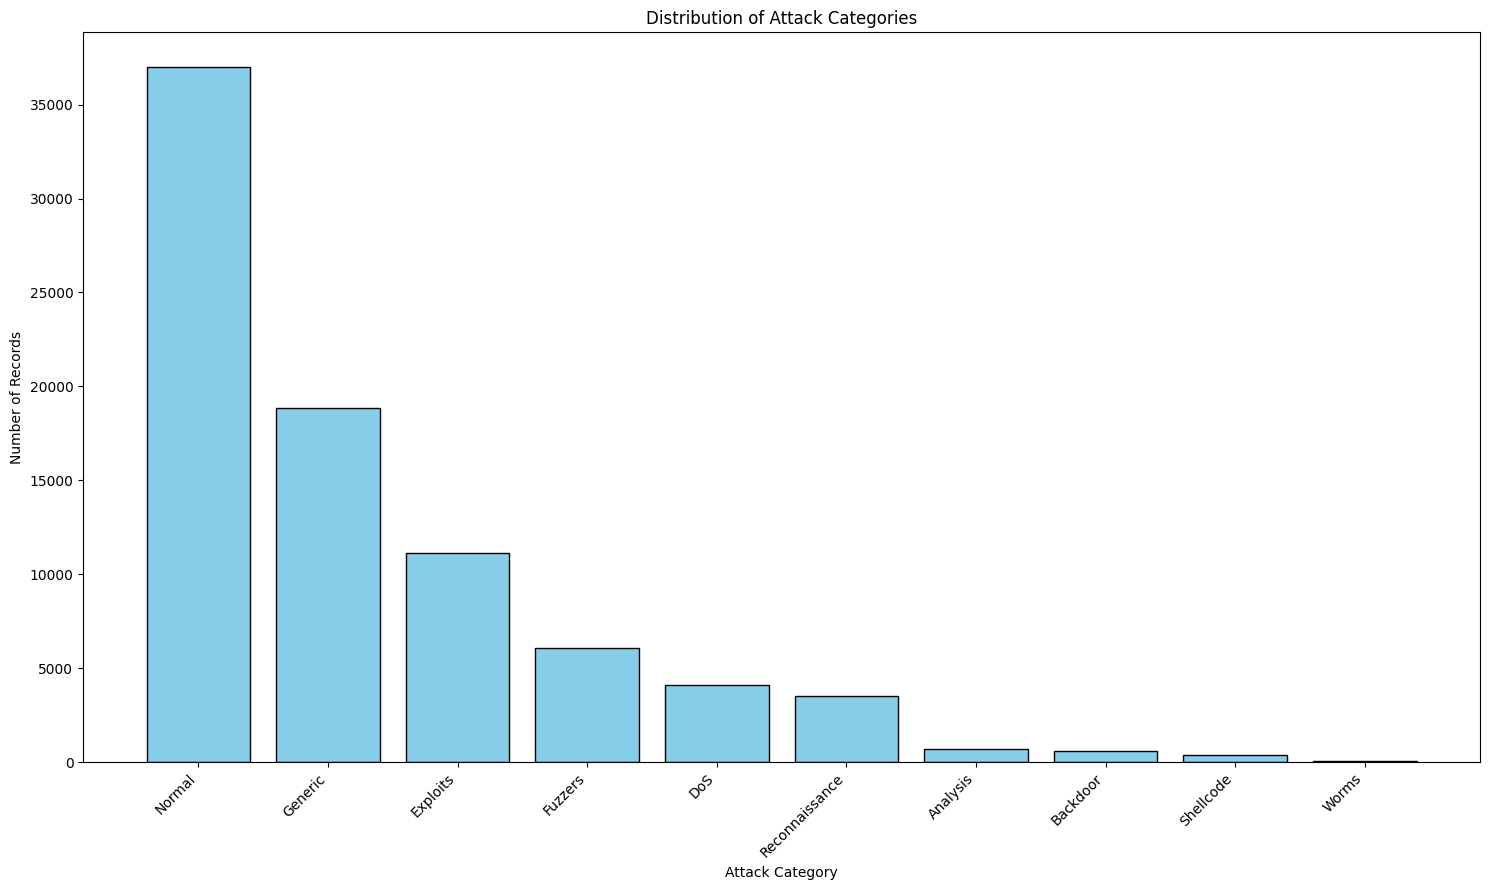

In [34]:
attack_counts = data['attack_cat'].value_counts()
plt.figure(figsize=(15,9))
plt.bar(attack_counts.index, attack_counts.values, color='skyblue',edgecolor='black')
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## TOP 10 PROTOCOL DISTRIBUTION
### From the visualization:
### 1. TCP (Transmission Control Protocol) - is the most dominant protocol, indicating that most network traffic in the dataset occurs over reliable, connection-oriented communications.
### 2. UDP (User Datagram Protocol) - represents lighter, connectionless communications such as DNS and streaming traffic.
### This distribution reflects a realistic network environment, where TCP and UDP dominate general network communication, while ICMP and other minor protocols contribute to background control traffic. 
### In cybersecurity analysis, understanding protocol frequency helps analysts detect anomalies.

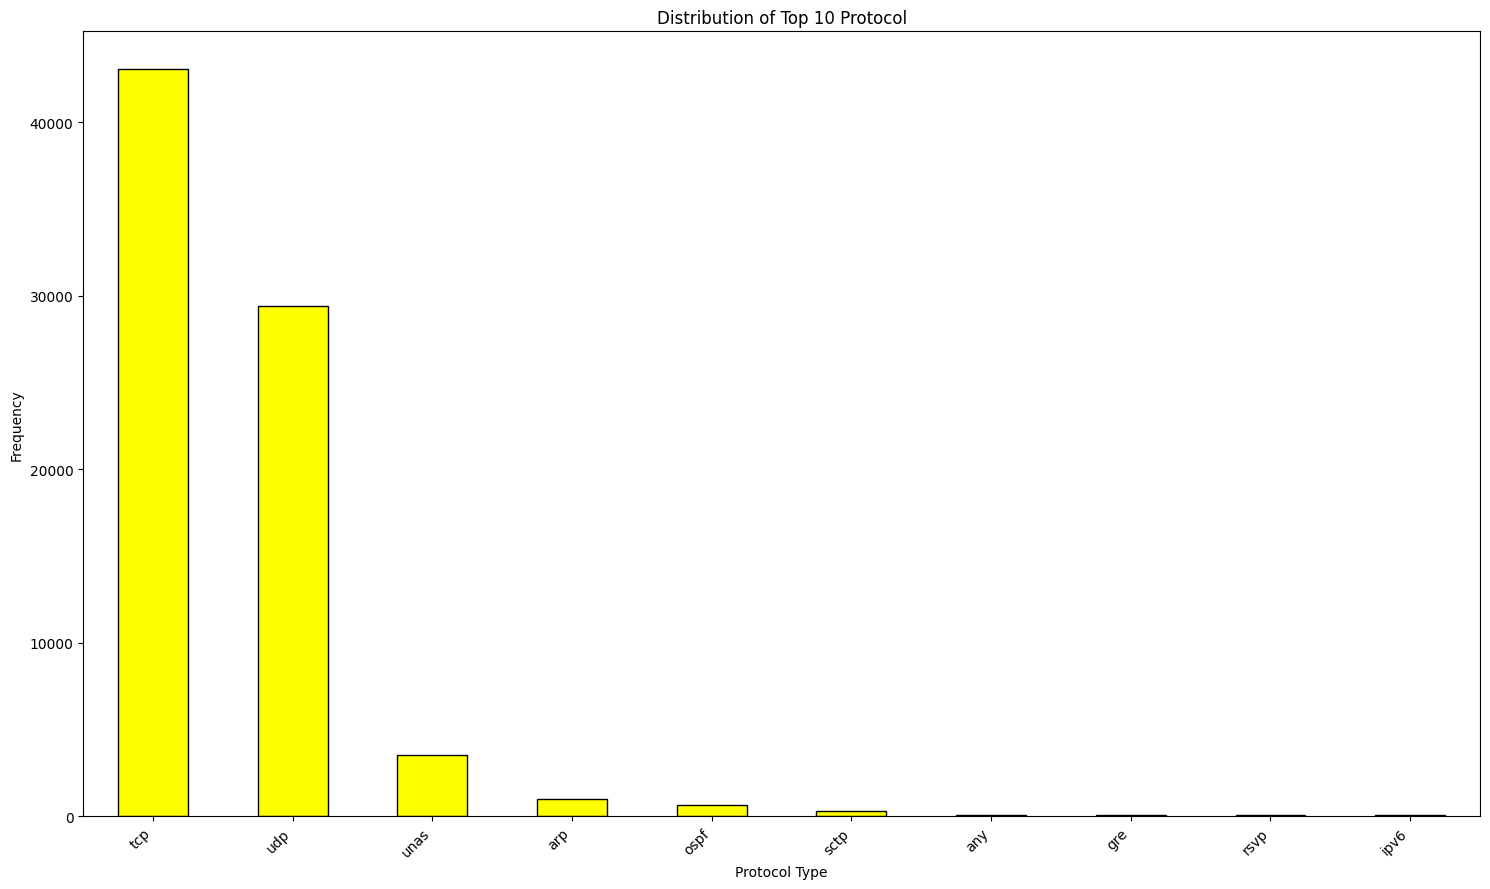

In [35]:
attack_counts = data['proto'].value_counts()
plt.figure(figsize=(15,9))
data['proto'].value_counts().head(10).plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Distribution of Top 10 Protocol')
plt.xlabel('Protocol Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,116.275069,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,6.468360,9.164262,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,244.600271,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,8.543927,11.121413,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,44.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,5.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,87.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,7.000000,11.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,1500.000000,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,60.000000,62.000000,1.000000
